In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications import vgg16, inception_v3, resnet50, mobilenet, densenet
import numpy as np

# Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')
 
# Load the Inception_V3 model
inception_model = inception_v3.InceptionV3(weights='imagenet')
 
# Load the ResNet50 model
resnet_model = resnet50.ResNet50(weights='imagenet')
 
# Load the MobileNet model
mobilenet_model = mobilenet.MobileNet(weights='imagenet')

# Load the DenseNet model
densenet_model = densenet.DenseNet201(weights='imagenet')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


PIL image size (224, 224)


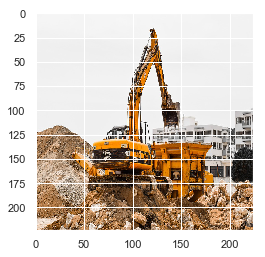

,Class,Confidence,Model
0,crane,0.544609,vgg16
1,snowplow,0.156260,vgg16
2,school_bus,0.048280,vgg16
3,plow,0.046167,vgg16
4,honeycomb,0.045319,vgg16
5,crane,0.479422,inception_v3
6,drilling_platform,0.146884,inception_v3
7,harvester,0.088808,inception_v3
8,lumbermill,0.022369,inception_v3
9,snowplow,0.008170,inception_v3


In [152]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
predres = {}
filename = 'example_image.jpg'
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size', original.size)
plt.imshow(original)
plt.show()
numpy_image = img_to_array(original)
image_batch = np.expand_dims(numpy_image, axis=0)

# load an image in PIL format
incep_original = load_img(filename, target_size=(299, 299))
incep_numpy_image = img_to_array(incep_original)
incep_image_batch = np.expand_dims(incep_numpy_image, axis=0)
models = [['vgg16', 'vgg_model', image_batch], ['inception_v3', 'inception_model', incep_image_batch],
          ['resnet50', 'resnet_model', image_batch], ['mobilenet', 'mobilenet_model', image_batch],
          ['densenet', 'densenet_model', image_batch]]
for mod in models:
    proc_image = globals()[mod[0]].preprocess_input(mod[2].copy())
    pred = globals()[mod[1]].predict(proc_image)
    predres[mod[0]] = decode_predictions(pred)

# REKOGNITION
import boto3
import base64

with open(filename, "rb") as image_file:
    encoded_string = image_file.read()
client = boto3.client('rekognition')
response = client.detect_labels(
    Image={
        'Bytes': encoded_string,
    },
    MaxLabels=5,
    MinConfidence=75.0
)

import matplotlib.pyplot as plt
import pandas as pd
import collections

res = []
for item in predres:
    for modeltype in predres[item]:
        for label in modeltype:
            res.append({'Model': item, 'Class': label[1], 'Confidence': label[2]})
for label in response['Labels']:
    res.append({'Model': 'Rekognition', 'Class': label['Name'].lower(), 'Confidence': label['Confidence'] / 100})
df = pd.DataFrame(res)
df


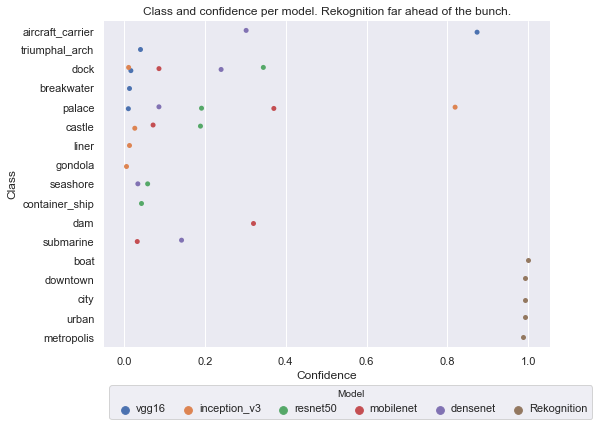

In [151]:
# Initialize the figure
f, ax = plt.subplots(figsize=(8,6))
plt.title('Class and confidence per model. Rekognition far ahead of the bunch.')
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="Confidence", y="Class", hue="Model",data=df)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:], labels[0:], title="Model",
          handletextpad=0, columnspacing=1,
          loc="upper left", bbox_to_anchor=(0,-0.1), ncol=8, frameon=True)